## Estadisticas 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#origen del archivo
csv_path='D:\Julio Assmann\Descargas\ProyectoFinal_Python\Data Sets\Data  Limpia\car_prices.csv'
df= pd.read_csv(csv_path)


<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:2: SyntaxWarning: invalid escape sequence '\J'
C:\Users\fpsju\AppData\Local\Temp\ipykernel_9984\3001974605.py:2: SyntaxWarning: invalid escape sequence '\J'
  csv_path='D:\Julio Assmann\Descargas\ProyectoFinal_Python\Data Sets\Data  Limpia\car_prices.csv'
C:\Users\fpsju\AppData\Local\Temp\ipykernel_9984\3001974605.py:3: DtypeWarning: Columns (9,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(csv_path)


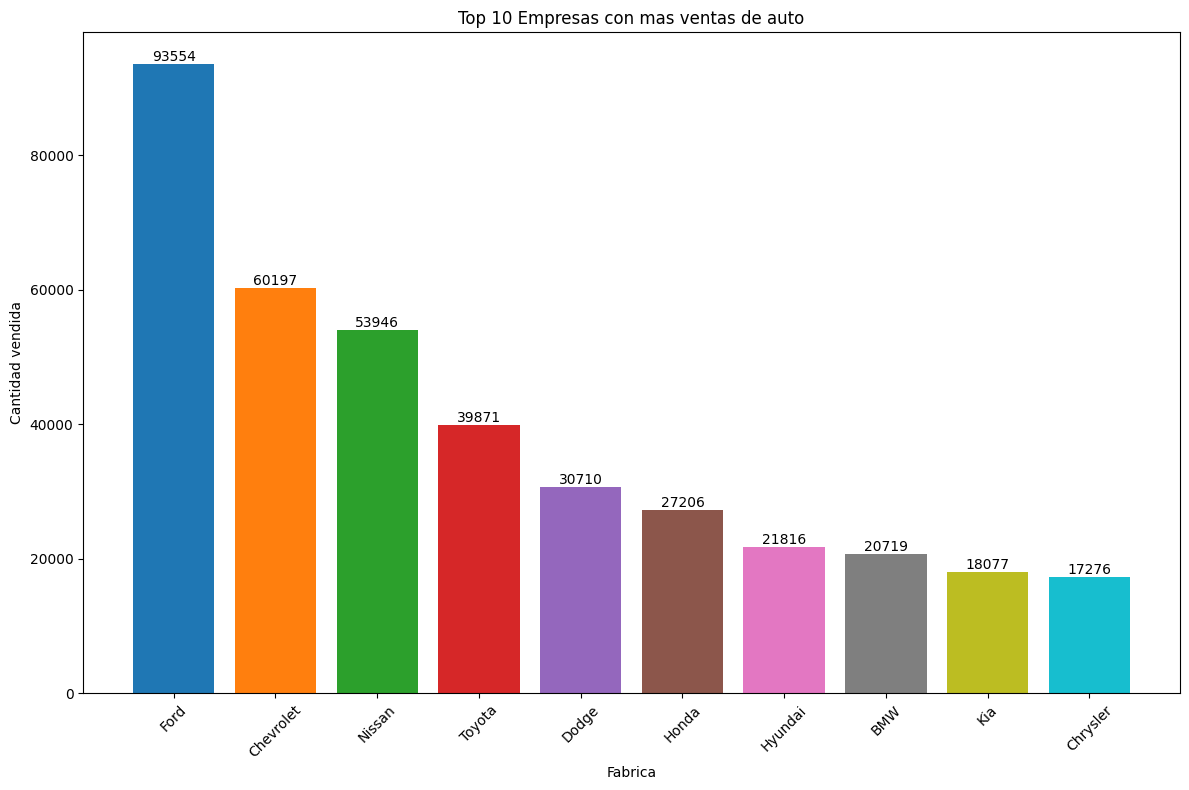

In [39]:
top_10_makes = df['make'].value_counts().head(10)

plt.figure(figsize=(12, 8))
colors = [plt.cm.tab10(i) for i in range(len(top_10_makes))]

bars = plt.bar(top_10_makes.index, top_10_makes.values, color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.title('Top 10 Empresas con mas ventas de auto')
plt.xlabel('Fabrica')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

In [40]:
#media
df['sellingprice'] = pd.to_numeric(df['sellingprice'], errors='coerce')
mean_selling_price = df['sellingprice'].mean()


print(f"La media del Precio de Venta es de: ${mean_selling_price:,.2f}")

La media del Precio de Venta es de: $13,698.60


In [41]:
#Moda
mode_model = df['model'].mode()
if not mode_model.empty:
    print(f"El Modelo mas Comprado fue: {mode_model[0]}")
else:
    print("Sin Moda definible.")


El Modelo mas Comprado fue: Altima


In [42]:
#mediana
median_condition = df['condition'].median()


print(f"La mediana en la condicion de los vehiculos es de: {median_condition}")

La mediana en la condicion de los vehiculos es de: 3.6


C:\Users\fpsju\AppData\Local\Temp\ipykernel_9984\362304347.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


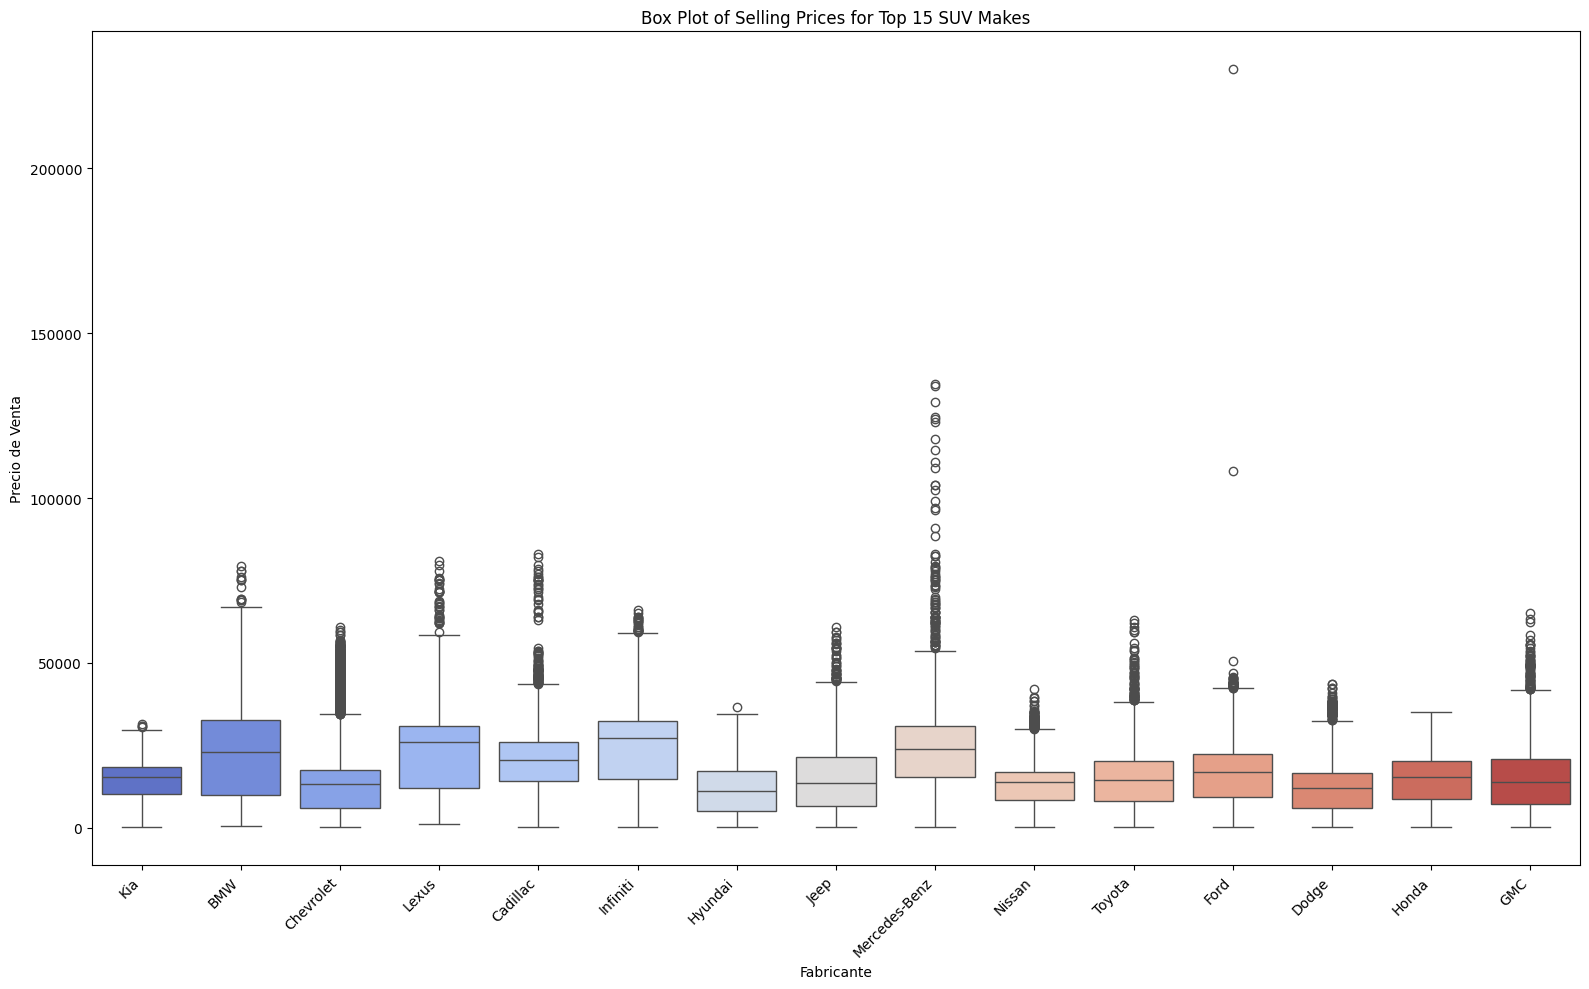

In [43]:
#Boxplot de promedio de ventas de SUVS para el top 15 de las empresas 
suv_df = df[df['body'] == 'SUV']
suv_count = suv_df['make'].value_counts().nlargest(15)

top_15_makes_df = suv_df[suv_df['make'].isin(suv_count.index)]

plt.figure(figsize=(16, 10))
sns.boxplot(
    data=top_15_makes_df,
    x='make',
    y='sellingprice',
    palette='coolwarm',
    showfliers=True
)

plt.title('Box Plot of Selling Prices for Top 15 SUV Makes')
plt.xlabel('Fabricante')
plt.ylabel('Precio de Venta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

C:\Users\fpsju\AppData\Local\Temp\ipykernel_9984\4060696283.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_year, x='saleyear', y='sales_count', palette='Blues')


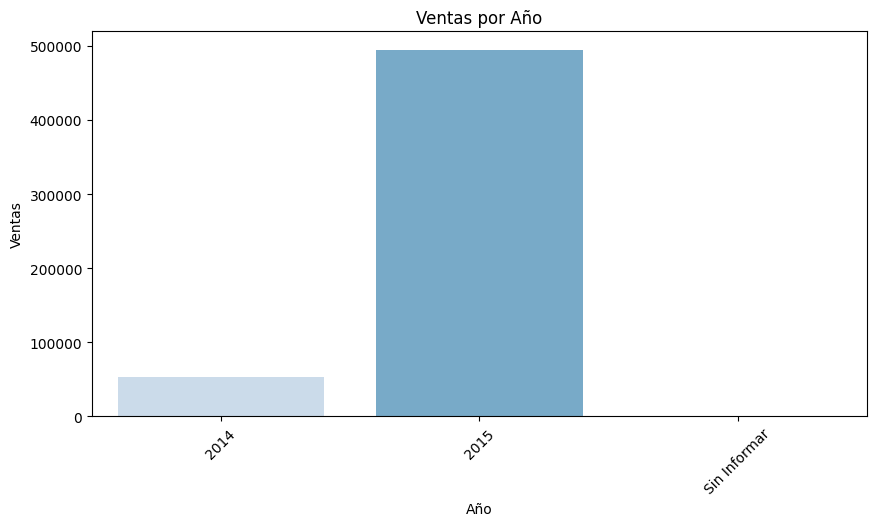

C:\Users\fpsju\AppData\Local\Temp\ipykernel_9984\4060696283.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_per_year, x='saleyear', y='avg_sellingprice', palette='Greens')


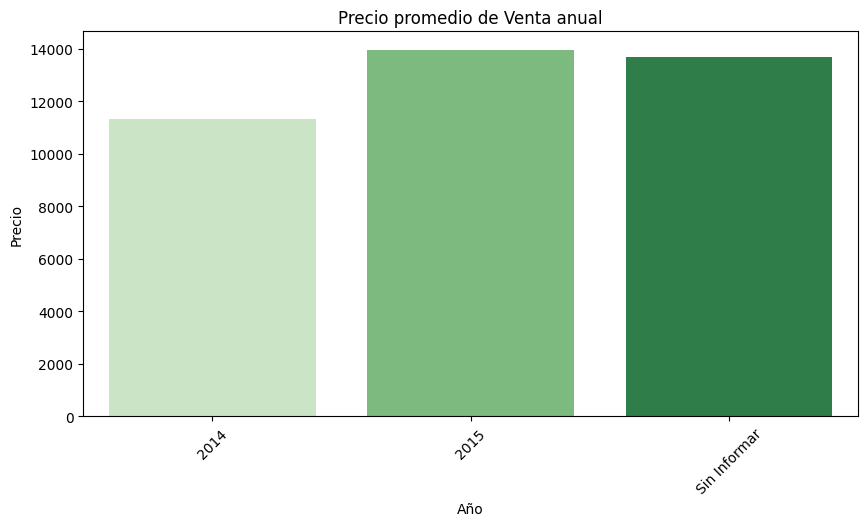

In [48]:
# Remplazar 1963 por sin informar 
df['saleyear'] = df['saleyear'].replace(1963, "Sin Informar")

# realizar el conteo de ventas por año
sales_per_year = df.groupby('saleyear').size().reset_index(name='sales_count')
average_price_per_year = df.groupby('saleyear')['sellingprice'].mean().reset_index(name='avg_sellingprice')

# 
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_per_year, x='saleyear', y='sales_count', palette='Blues')
plt.title('Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

# 
plt.figure(figsize=(10, 5))
sns.barplot(data=average_price_per_year, x='saleyear', y='avg_sellingprice', palette='Greens')
plt.title('Precio promedio de Venta anual')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()